In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Task 1: Register and obtain an API key from OpenWeatherMap.
api_key = "a9222bff6f6447067f6bfc41ebea85f9"

In [15]:
# Task 2: Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.
  # Replace with your desired city
url = f"http://api.openweathermap.org/data/2.5/forecast?q=Pune&appid={api_key}"

In [16]:
response = requests.get(url)



In [17]:
if response.status_code == 200:
    weather_data = response.json()
else:
    print("Failed to retrieve weather data. Check your API key and city name.")

In [28]:
# Task 3: Extract relevant weather attributes from the API response.
weather_list = weather_data["list"]
weather_attributes = [data["main"] for data in weather_list]
#print(weather_attributes)

In [29]:
# Task 4: Clean and preprocess the retrieved data.
weather_df = pd.DataFrame(weather_attributes)
weather_df["dt"] = pd.to_datetime([data["dt"] for data in weather_list], unit="s")
weather_df.set_index("dt", inplace=True)
#print(weather_df)

In [25]:
# Task 5: Perform data modeling to analyze weather patterns.
average_temperature = weather_df["temp"].mean()
max_temperature = weather_df["temp"].max()
min_temperature = weather_df["temp"].min()
print('Max Temp: ', max_temperature)
print('Min temp :', min_temperature)

Max Temp:  305.45
Min temp : 293.44


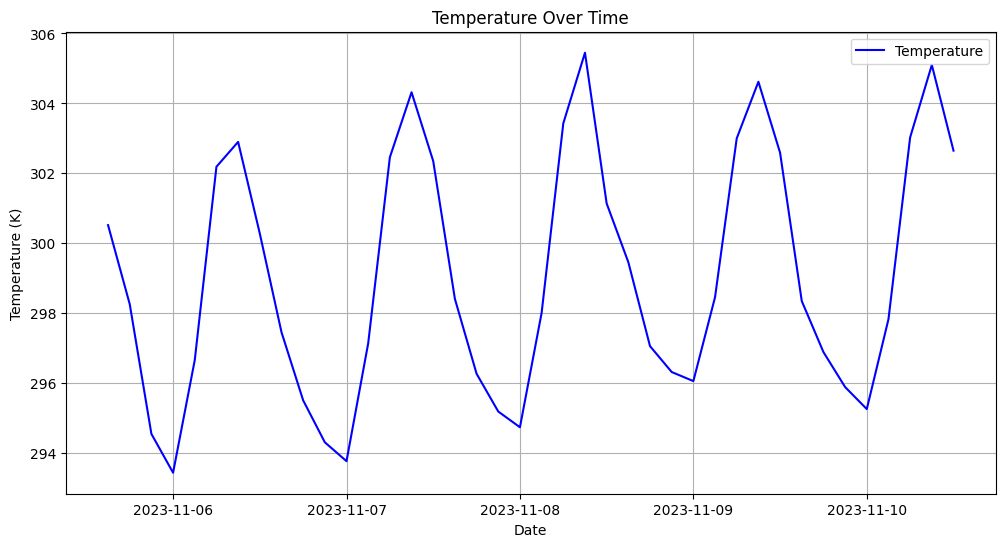

In [30]:
# Task 6: Visualize the weather data.
plt.figure(figsize=(12, 6))
plt.plot(weather_df.index, weather_df["temp"], label="Temperature", color="blue")
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid()
plt.show()

In [34]:
# Task 7: Apply data aggregation techniques to summarize weather statistics by specific time periods.
daily_weather = weather_df.resample("D").mean()
monthly_weather = weather_df.resample("M").mean()
seasonal_weather = weather_df.resample("Q").mean()

# print('Daily weather: ')
# print(daily_weather)
# print('Monthly weather: ')
# print(monthly_weather)
# print('seasonal_weather: ')
# print(seasonal_weather)

Daily weather: 
                  temp  feels_like   temp_min    temp_max  pressure  \
dt                                                                    
2023-11-05  297.776667   297.51000  296.54000  297.776667  1013.000   
2023-11-06  297.843750   297.33125  297.84375  297.843750  1014.250   
2023-11-07  298.738750   298.50625  298.73875  298.738750  1013.250   
2023-11-08  299.451250   299.65500  299.45125  299.451250  1012.375   
2023-11-09  299.482500   299.61000  299.48250  299.482500  1013.000   
2023-11-10  300.774000   300.86600  300.77400  300.774000  1013.800   

            sea_level  grnd_level   humidity   temp_kf  
dt                                                      
2023-11-05   1013.000  951.666667  44.666667  1.236667  
2023-11-06   1014.250  952.500000  44.125000  0.000000  
2023-11-07   1013.250  951.875000  50.125000  0.000000  
2023-11-08   1012.375  951.250000  58.375000  0.000000  
2023-11-09   1013.000  951.625000  58.750000  0.000000  
2023-11-10   101

In [35]:
# Note: Geographical data is not available in the OpenWeatherMap API response.

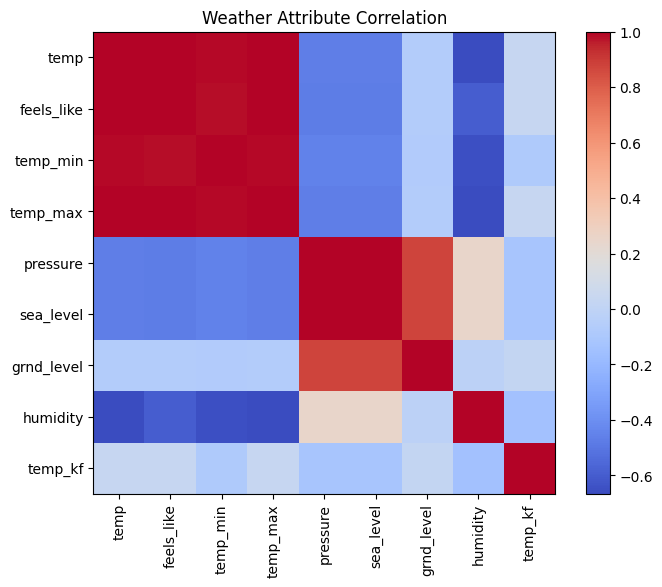

In [36]:
# Task 9: Explore and visualize relationships between weather attributes.
correlation_matrix = weather_df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Weather Attribute Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()